In [1]:
import urllib
url = 'https://bank.gov.ua/NBU_Exchange/exchange?date=01012021&json'
urllib.request.urlretrieve(url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7fddb85c8110>)

In [2]:
import pandas as pd
import json
f = open('data.json', 'r')
json_str = f.read()
pd.DataFrame(json.loads(json_str)).to_csv("data.csv", index=False)

In [3]:
import logging
import boto3
from botocore.exceptions import ClientError
import os
import glob
def upload_file(file_name, bucket, object_name=None):
    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = os.path.basename(file_name)
    # Upload the file
    s3_client = boto3.client('s3')
    try:
        response = s3_client.upload_file(file_name, bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True

os.chdir("./")
for file in glob.glob("*.csv"):
    print(file)
    upload_file(file, 'data.hurdzhyia')

data.csv


In [4]:
!aws s3 ls data.hurdzhyia/

2022-04-22 16:21:03       5034 currency.png
2022-04-22 16:27:27       2117 data.csv


     StartDate  TimeSign  CurrencyCode CurrencyCodeL  Units      Amount
0   01.01.2021         0            36           AUD      1     21.6852
1   01.01.2021         0           944           AZN      1     16.6439
2   01.01.2021         0           933           BYN      1     10.9477
3   01.01.2021         0           975           BGN      1     17.7571
4   01.01.2021         0           410           KRW    100      2.6015
..         ...       ...           ...           ...    ...         ...
56  01.01.2021         0           860           UZS   1000      2.6988
57  01.01.2021         0           959           XAU      1  53200.9200
58  01.01.2021         0           961           XAG      1    744.1900
59  01.01.2021         0           962           XPT      1  30203.4900
60  01.01.2021         0           964           XPD      1  66289.5200

[61 rows x 6 columns]


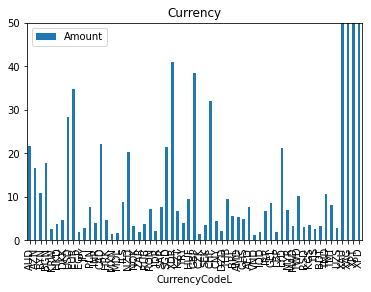

In [5]:
import boto3
import matplotlib.pyplot as plt
import pandas as pd
import io
s3 = boto3.resource('s3')
bucket = s3.Bucket('data.hurdzhyia')
obj = s3.ObjectSummary(bucket_name='data.hurdzhyia', key='data.csv')
file_content = obj.get()['Body'].read()
data_frame = pd.read_csv(io.BytesIO(file_content))
print(data_frame)

df = pd.DataFrame(data_frame, columns=['CurrencyCodeL', 'Amount'])
df.plot(x = 'CurrencyCodeL', y = 'Amount', kind = 'bar')
plt.title("Currency")
plt.ylim(0, 50)
plt.show()

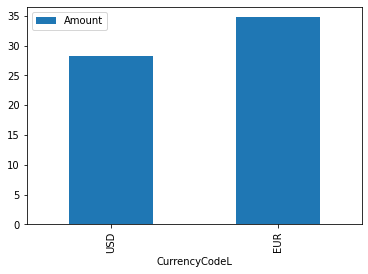

In [6]:
import boto3
import matplotlib.pyplot as plt
import pandas as pd
import io
s3 = boto3.resource('s3')
bucket = s3.Bucket('data.hurdzhyia')
obj = s3.ObjectSummary(bucket_name='data.hurdzhyia', key='data.csv')
file_content = obj.get()['Body'].read()
data_frame = pd.read_csv(io.BytesIO(file_content))

df = pd.DataFrame(data_frame, columns=['CurrencyCodeL', 'Amount'], index=[7,8])
df.plot(x = 'CurrencyCodeL', y = 'Amount', kind = 'bar')
plt.savefig("currency.png")
plt.show()

In [7]:
!aws s3 cp currency.png s3://data.hurdzhyia/

upload: ./currency.png to s3://data.hurdzhyia/currency.png     


In [8]:
!aws s3 ls data.hurdzhyia/

2022-04-22 16:28:16       5034 currency.png
2022-04-22 16:27:27       2117 data.csv
